              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year  
count    392.000000  392.000000  
mean      15.541327   75.979592  
std        2.758864    3.683737  
min        8.000000   70.000000  
25%       13.775000   73.000000  
50%       15.500000   76.000000  
75%       17.025000   79.000000  
max       24.800000   82.000000  
    mpg  cylinders  displacement  horsepower 

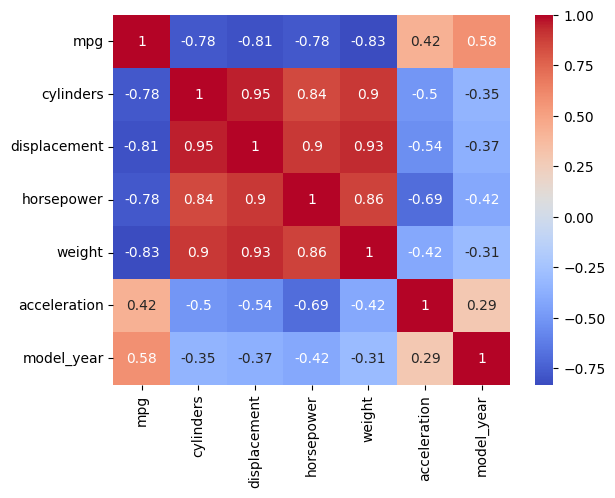

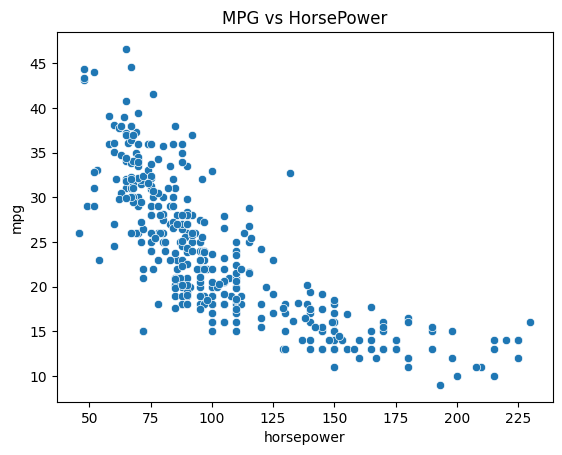

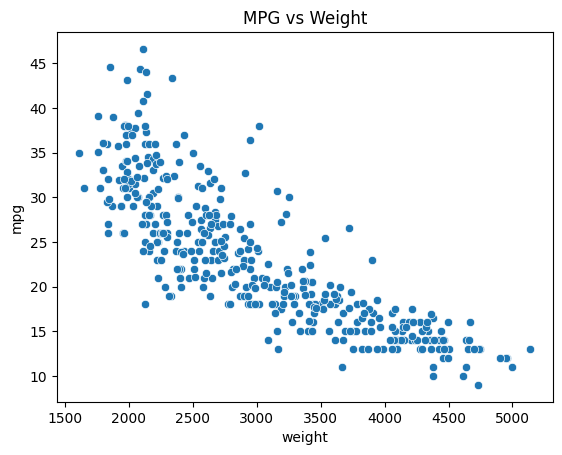

Train R²: 0.811, RMSE: 3.46
Test R²: 0.794, RMSE: 3.24


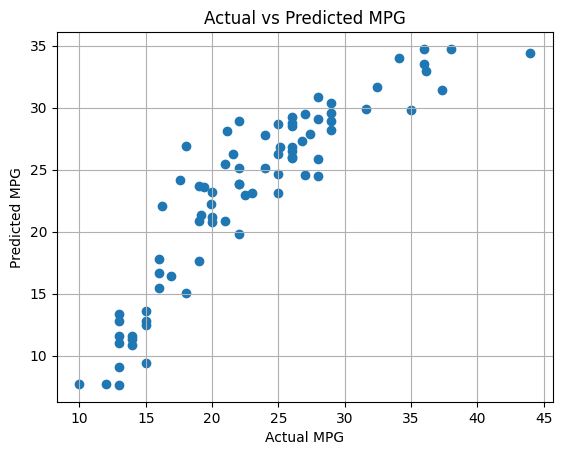

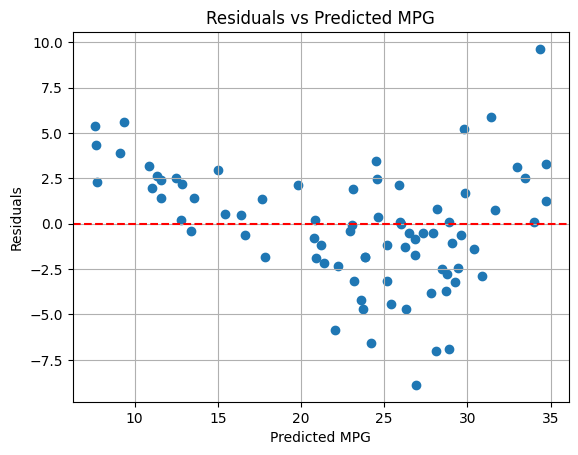

        Feature  Coefficient
0     cylinders    -0.116173
1  displacement     0.001013
2    horsepower    -0.002276
3        weight    -0.006561
4  acceleration     0.061736
5    model_year     0.760636


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("mpg.csv")
df.head()
df.dropna(inplace=True)
print(df.describe())
print(df.head())
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm")
plt.show()


sns.scatterplot(x="horsepower",y="mpg",data=df)
plt.title("MPG vs HorsePower")
plt.show()

sns.scatterplot(x='weight', y='mpg', data=df)
plt.title('MPG vs Weight')
plt.show()
df = df.select_dtypes(include=[np.number])  
X = df.drop('mpg', axis=1)
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train R²: {r2_train:.3f}, RMSE: {rmse_train:.2f}")
print(f"Test R²: {r2_test:.3f}, RMSE: {rmse_test:.2f}")
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.grid(True)
plt.show()

residuals = y_test - y_pred_test
plt.scatter(y_pred_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted MPG")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted MPG")
plt.grid(True)
plt.show()

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

